In [43]:
import pandas as pd
import numpy as np 
import os
import plotly.express as px
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from matplotlib import pyplot
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# For investigating timeseries data
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing

In [32]:
# Reading Data
base_path =  os.getcwd()
file_name = 'Traffic_Data.xlsx'
total_path = base_path + '//Data//' 
df = pd.read_excel(total_path + file_name, sheet_name='Sheet1')
df.head(10)

,State,Region,STATIONS,CMILES,PMILES,Month,Month_2,Year,Date
0,Connecticut,Northeast,14,2546,2432,November,11,2023,2023-11-01
1,Maine,Northeast,130,1177,1148,November,11,2023,2023-11-01
2,Massachusetts,Northeast,227,5148,5013,November,11,2023,2023-11-01
3,New Hampshire,Northeast,150,1062,1034,November,11,2023,2023-11-01
4,New Jersey,Northeast,73,6569,6339,November,11,2023,2023-11-01
5,New York,Northeast,110,9144,8825,November,11,2023,2023-11-01
6,Pennsylvania,Northeast,57,8610,8408,November,11,2023,2023-11-01
7,Rhode Island,Northeast,26,661,659,November,11,2023,2023-11-01
8,Vermont,Northeast,35,543,531,November,11,2023,2023-11-01
9,Delaware,South Atlantic,0,923,900,November,11,2023,2023-11-01


### Initial Decomposition

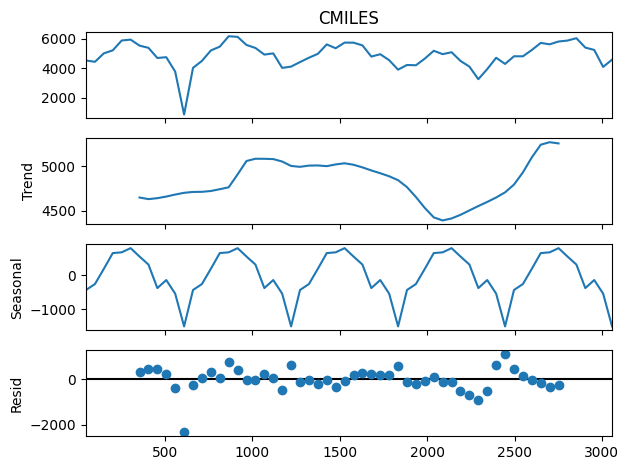

In [33]:
result = seasonal_decompose(df[df['State'] == 'Washington']['CMILES'], model='additive', period=12)
result.plot()
pyplot.show()

### Checking if Data is Stationary

In [34]:
dftest = adfuller(df['CMILES'])

# Printing results
print('ADF Statistic: %f' % dftest[0])
print('p-value: %f' % dftest[1])
print('Critical Values:')
for key, value in dftest[4].items():
 print('\t%s: %.3f' % (key, value))

# p < 0.05 so data is stationary

ADF Statistic: -6.015802
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567


### Checking ACF
Need to determine autocorrelation coefficient, i.e. how many time steps back is our current datapoint dependent on

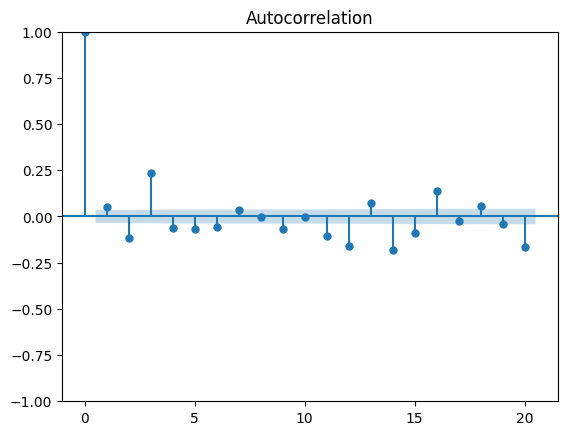

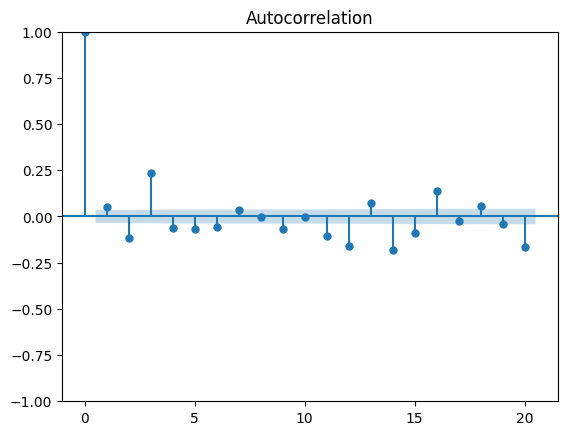

In [35]:
plot_acf(df['CMILES'], lags= 20)

## Training Model MA model

In [69]:
test_train_split = 0.9
train = df[:int(test_train_split * len(df['CMILES']))]
test = df[int(test_train_split * len(df['CMILES'])):]

In [76]:
def train_MA(train, test):

    # Initializing list to store predictions
    pred_MA = []

    predictions = []
    for month in range(len(test)):
        model = SARIMAX(train, order= (0, 0, 2))
        model_fit = model.fit()
        output = model_fit.forecast()
        pred_MA.append(output)

        return pred_MA

train_len = len(train)
test_len = len(test)
window = 2

# calling function and returning predictions
ma_predictions = train_MA(train['CMILES'], test['CMILES'])
print(ma_predictions)


[2754   -747.718064
dtype: float64]


In [75]:
ma_predicted_df = test.copy()
ma_predicted_df['MA_Pred'] = ma_predictions
ma_predicted_df.head(10)

ValueError: Length of values (1) does not match length of index (306)

ValueError: setting an array element with a sequence.

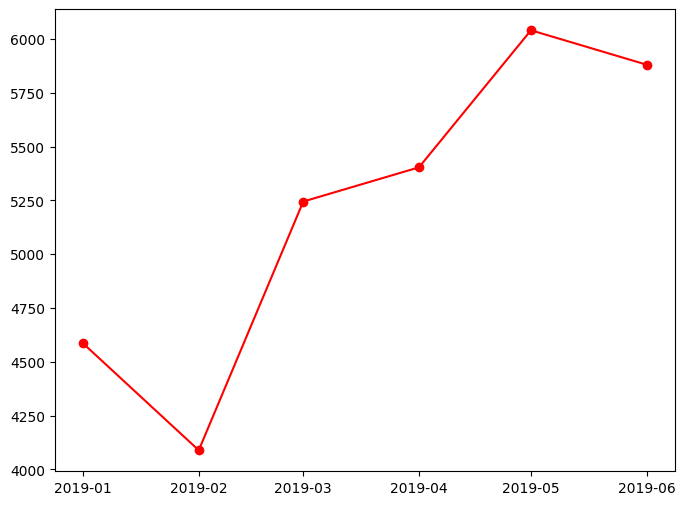

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['CMILES'], color='RED')

# Adding lines
ax.plot(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
        ma_predicted_df[ma_predicted_df['State'] == 'Washington']['MA_Pred'], color='BLUE')
ax.scatter(ma_predicted_df[ma_predicted_df['State'] == 'Washington']['Date'], 
           ma_predicted_df[ma_predicted_df['State'] == 'Washington']['MA_Pred'], color='BLUE')


plt.show()